# Projeto 3 - análise exploratória#
#### Antonio Fonseca, Daniel Pucciariello e José Bechara.####

## Tema:##
*Prever se um projeto do kickstarter irá ser bem sucedido ou não.*

Técnica: Classificador.

https://www.kaggle.com/kemical/kickstarter-projects


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import probplot, norm, t
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
data = pd.read_csv('ks-projects-201801.csv', parse_dates=['deadline', 'launched'])
data1 = data.replace("canceled", "failed").replace("undefined", "failed").replace("suspended", "failed")
data2=data1.loc[:,["usd_pledged_real", "usd_goal_real"]]

In [3]:
print("DataFrame com categorias alteradas, de modo a ter somente 'live','failed','successful'.")
data1.head()


DataFrame com categorias alteradas, de modo a ter somente 'live','failed','successful'.


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,failed,14,US,1283.0,1283.0,19500.00


In [4]:
print("Comparacao entre o valor necessario ou o valor que se conseguiu na campanha.")
data2.head()

Comparacao entre o valor necessario ou o valor que se conseguiu na campanha.


,usd_pledged_real,usd_goal_real
0,0.0,1533.95
1,2421.0,30000.00
2,220.0,45000.00
3,1.0,5000.00
4,1283.0,19500.00


In [5]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [6]:
data.main_category.value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [36]:
data1.state.value_counts()

failed        241906
successful    133956
live            2799
Name: state, dtype: int64

In [8]:
failed=data1.state.value_counts()[0]
sucessful=data1.state.value_counts()[1]
print("Número de projetos que falharam:", failed)
print("Número de projetos bem sucedidos:", sucessful)
print("Porcentagem de sucesso:", 100*sucessful/(failed + sucessful), "%")

Número de projetos que falharam: 241906
Número de projetos bem sucedidos: 133956
Porcentagem de sucesso: 35.639676264160784 %


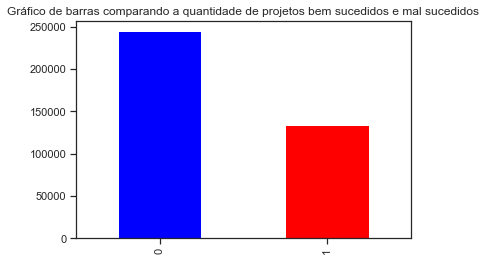

In [53]:
df=data_delta_t_dummy["state_successful"].value_counts()
df.plot(kind='bar', color=('blue', 'red'), legend=False)
plt.title("Gráfico de barras comparando a quantidade de projetos bem sucedidos e mal sucedidos")
plt.show();

In [9]:
colunas = list(data.columns)
colunas

['ID',
 'name',
 'category',
 'main_category',
 'currency',
 'deadline',
 'goal',
 'launched',
 'pledged',
 'state',
 'backers',
 'country',
 'usd pledged',
 'usd_pledged_real',
 'usd_goal_real']

In [10]:
crosstab1 = pd.crosstab(data.main_category,data.state,margins=True,rownames=['Main Category'], colnames=['state'])
crosstab1

state,canceled,failed,live,successful,suspended,undefined,All
Main Category,,,,,,,
Art,2222,14131,194,11510,96,0,28153
Comics,842,4036,76,5842,23,0,10819
Crafts,843,5703,76,2115,72,0,8809
Dance,163,1235,18,2338,13,1,3768
Design,4152,14814,305,10550,247,2,30070
Fashion,2650,14182,250,5593,138,3,22816
Film & Video,5755,32904,332,23623,117,854,63585
Food,2211,15969,184,6085,153,0,24602
Games,6202,16003,287,12518,220,1,35231


In [11]:
crosstab2 = pd.crosstab(data1.main_category,data1.state,margins=True,rownames=['Main Category'], colnames=['state'])
crosstab2

state,failed,live,successful,All
Main Category,,,,
Art,16449,194,11510,28153
Comics,4901,76,5842,10819
Crafts,6618,76,2115,8809
Dance,1412,18,2338,3768
Design,19215,305,10550,30070
Fashion,16973,250,5593,22816
Film & Video,39630,332,23623,63585
Food,18333,184,6085,24602
Games,22426,287,12518,35231


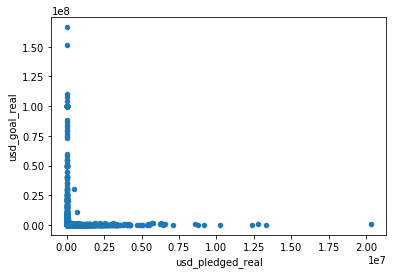

In [12]:
data2.plot.scatter(x="usd_pledged_real", y = "usd_goal_real");

In [13]:
data1.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,failed,14,US,1283.0,1283.0,19500.00


In [14]:
def calculo_dias(date1,date2):
    date_format = "%Y-%m-%d %H:%M:%S"
    a = datetime.strptime(date1, date_format)
    b = datetime.strptime(date2, date_format)
    delta= a-b
    return delta.days


In [15]:
delta_t =[]
for e,i in zip(data.deadline, data.launched):
    e = str(e)
    i = str(i)
    a = calculo_dias(e,i)
    delta_t.append(a)

In [16]:
data_delta_t=data1
data_delta_t["deltat (days)"]=delta_t

In [17]:
data_delta_t=data_delta_t.drop(columns=['pledged', 'deadline', "launched", "goal", "backers", "ID", 'usd pledged'])

In [51]:
data_delta_t.set_index("name").head()

,category,main_category,currency,state,country,usd_pledged_real,usd_goal_real,deltat (days)
name,,,,,,,,
The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,failed,GB,0.0,1533.95,58
Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,failed,US,2421.0,30000.00,59
Where is Hank?,Narrative Film,Film & Video,USD,failed,US,220.0,45000.00,44
ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,failed,US,1.0,5000.00,29
Community Film Project: The Art of Neighborhood Filmmaking,Film & Video,Film & Video,USD,failed,US,1283.0,19500.00,55


In [19]:
y_vars=["state"]

In [20]:
x_vars = ["deltat (days)", "usd_pledged_real", "usd_goal_real"]

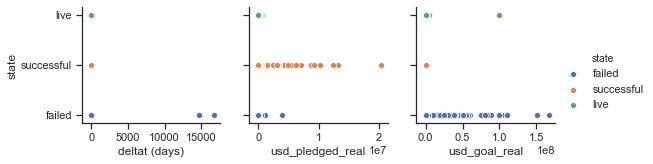

In [21]:
sns.set(style="ticks")

sns.pairplot(data_delta_t, hue="state", x_vars=x_vars, y_vars=y_vars)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


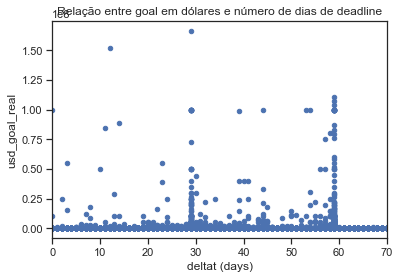

In [32]:
data_delta_t.plot.scatter(x="deltat (days)", y = "usd_goal_real");
plt.xlim(0, 70)
plt.title("Relação entre goal em dólares e número de dias de deadline")
plt.show();


In [23]:
def dummify(data, column_name):
    """
        Converte a coluna column_name em dummies / one-hot e as adiciona ao dataframe
        retorna uma copia do  df original *sem* a coluna que foi dummified
    """
    df = data.copy()
    # Nota: se você for um econometrista, pode se interessar por usar a opção dropFirst = True na get_dummies
    df2 = pd.concat([df.drop(column_name, axis=1), pd.get_dummies(data[column_name], prefix=column_name)], axis=1)
    return df2

In [24]:
data_delta_t_dummy=dummify(data_delta_t, "state")
data_delta_t_dummy.head()

,name,category,main_category,currency,country,usd_pledged_real,usd_goal_real,deltat (days),state_failed,state_live,state_successful
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,GB,0.0,1533.95,58,1,0,0
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,US,2421.0,30000.00,59,1,0,0
2,Where is Hank?,Narrative Film,Film & Video,USD,US,220.0,45000.00,44,1,0,0
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,US,1.0,5000.00,29,1,0,0
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,US,1283.0,19500.00,55,1,0,0
